<a href="https://colab.research.google.com/github/cindyhps/google_collab/blob/main/House_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok Machine Learning

In [ ]:
#Anggota Kelompok:

#1. Cindy Hapsari (2215101032)
#2. Mohammed Izzy Killian (2215101056)
#3. Gede Bayu Saputra (2215101058)
#4. Ivonia Fatima Viegas (2215101085)

Library

In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, PowerTransformer
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Data

In [ ]:
#unzip data
zip_path = '/content/drive/My Drive/archive.zip'
extract_to = '/content/house_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

extracted_files = os.listdir(extract_to)
print("Extracted Files:", extracted_files)

Extracted Files: ['DATA RUMAH.xlsx', 'HARGA RUMAH JAKSEL.xlsx']


In [ ]:
#read data
data_rumah = pd.read_excel(f"{extract_to}/DATA RUMAH.xlsx")
harga_rumah_jaksel = pd.read_excel(f"{extract_to}/HARGA RUMAH JAKSEL.xlsx")

print(data_rumah.head())
print(harga_rumah_jaksel.head())

   NO                                         NAMA RUMAH       HARGA   LB  \
0   1  Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...  3800000000  220   
1   2  Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...  4600000000  180   
2   3  Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...  3000000000  267   
3   4           Rumah Baru Tebet, Tebet, Jakarta Selatan   430000000   40   
4   5  Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...  9000000000  400   

    LT  KT  KM  GRS  
0  220   3   3    0  
1  137   4   3    2  
2  250   4   4    4  
3   25   2   2    0  
4  355   6   5    3  
    Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0        HARGA         LT         LB        JKT        JKM        GRS   
1  28000000000       1100        700          5          6        ADA   
2  19000000000        824        800          4          4        ADA   
3   4700000000        500        400          4          3        ADA   
4   4900000000        251        300    

Process Data

In [ ]:
#Check
data_rumah = pd.read_excel(f"{extract_to}/DATA RUMAH.xlsx")
harga_rumah_jaksel = pd.read_excel(f"{extract_to}/HARGA RUMAH JAKSEL.xlsx")

In [ ]:
# Clean and prepare the data
data_rumah['GRS'] = data_rumah['GRS'].apply(lambda x: 1 if x > 0 else 0)  # Convert garage availability to binary
harga_rumah_jaksel.columns = ['HARGA', 'LT', 'LB', 'KT', 'KM', 'GRS', 'KOTA']
harga_rumah_jaksel['GRS'] = harga_rumah_jaksel['GRS'].apply(lambda x: 1 if x == 'ADA' else 0)

In [ ]:
#clean part 2
data_rumah[['HARGA', 'LB', 'LT', 'KT', 'KM']] = data_rumah[['HARGA', 'LB', 'LT', 'KT', 'KM']].apply(pd.to_numeric, errors='coerce')
harga_rumah_jaksel[['HARGA', 'LB', 'LT', 'KT', 'KM']] = harga_rumah_jaksel[['HARGA', 'LB', 'LT', 'KT', 'KM']].apply(pd.to_numeric, errors='coerce')

house_data = pd.concat([data_rumah[['HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS']],
                        harga_rumah_jaksel[['HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS']]], ignore_index=True)

house_data.dropna(inplace=True)

In [ ]:
# Combine datasets
house_data = pd.concat([data_rumah[['HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS']],
                            harga_rumah_jaksel[['HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS']]],
                        ignore_index=True)
house_data.dropna(inplace=True)  # Drop rows with missing values

Features (Split Data untuk Training-Test Data), Scalling, Outliner

In [ ]:
#Transform Skwed Features
skewed_features = ['LB', 'LT', 'HARGA']
pt = PowerTransformer(method='yeo-johnson')
house_data[skewed_features] = pt.fit_transform(house_data[skewed_features])

In [ ]:
# Hitung skewness sebelum dan setelah transformasi
original_skewness = house_data[skewed_features].skew()

# Hasil transformasi diubah menjadi DataFrame untuk menghitung skewness
transformed_data = pd.DataFrame(pt.transform(house_data[skewed_features]), columns=skewed_features)
transformed_skewness = transformed_data.skew()


In [ ]:
#Define Features
X = house_data[['LB', 'LT', 'KT', 'KM', 'GRS']]  # Features
y = house_data['HARGA']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#split

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
transformer = PowerTransformer()
X_train_scaled = transformer.fit_transform(X_train_scaled)
X_test_scaled = transformer.transform(X_test_scaled)

In [ ]:
# Ensure both X and y have no NaN values and match in length
train_data = pd.concat([X_train, y_train], axis=1).dropna()
X_train = train_data[X_train.columns]
y_train = train_data['HARGA']

test_data = pd.concat([X_test, y_test], axis=1).dropna()
X_test = test_data[X_test.columns]
y_test = test_data['HARGA']

In [ ]:
# Cetak hasil skewness
print("Skewness sebelum transformasi:")
print(original_skewness)

print("\nSkewness setelah transformasi:")
print(transformed_skewness)

Skewness sebelum transformasi:
LB      -0.001748
LT       0.017640
HARGA   -0.001444
dtype: float64

Skewness setelah transformasi:
LB      -1.912612
LT      -2.451634
HARGA   -2.174444
dtype: float64


Model Prediksi Regresi

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(X_test.dtypes)

LB     float64
LT     float64
KT     float64
KM     float64
GRS      int64
dtype: object


In [ ]:
#Convert Collumns to Numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values to avoid errors
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)


In [ ]:
#model testing
y_pred = model.predict(X_test)

In [ ]:
#Analisa Error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
#Nilai Print
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 0.2927071243816127
Mean Squared Error: 0.15520247338588797
Root Mean Squared Error: 0.3939574512379325
R-squared: 0.8352034723603061


Slope, Variance, Co-variance dan Intercept

In [ ]:
# Print slope untuk per fitur
slope = model.coef_
features = X_train.columns

In [ ]:
print("Slope (Coefficient) values for each feature:")
for feature, coef in zip(features, slope):
    print(f"{feature}: {coef}")

Slope (Coefficient) values for each feature:
LB: 0.4012342839329857
LT: 0.5319589566939826
KT: -0.0425386441546875
KM: 0.05785215889563505
GRS: 0.1359194731075846


In [ ]:
intercept = model.intercept_
print("\nIntercept (constant term):", intercept)


Intercept (constant term): -0.13252208618315608


In [ ]:
variance = X_train.var()
print("Variance of each feature:")
print(variance)

# Hitung kovariansi antara setiap fitur dan variabel target
# Gabungkan fitur dengan variabel target dalam satu DataFrame untuk perhitungan kovariansi
data_for_covariance = pd.concat([X_train, y_train], axis=1)
covariance_matrix = data_for_covariance.cov()
print("\nCovariance matrix:")
print(covariance_matrix)

Variance of each feature:
LB     1.023311
LT     1.019317
KT     2.647707
KM     2.420548
GRS    0.145514
dtype: float64

Covariance matrix:
             LB        LT        KT        KM       GRS     HARGA
LB     1.023311  0.842301  0.603054  0.754509  0.046178  0.882930
LT     0.842301  1.019317  0.571870  0.601753  0.029671  0.894714
KT     0.603054  0.571870  2.647707  1.852521  0.032694  0.545163
KM     0.754509  0.601753  1.852521  2.420548  0.047914  0.690586
GRS    0.046178  0.029671  0.032694  0.047914  0.145514  0.055471
HARGA  0.882930  0.894714  0.545163  0.690586  0.055471  1.015202


In [ ]:
# Min-Max scaling for variance and covariance
def min_max_scale(data):
    min_val = data.min()
    max_val = data.max()
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

# Scale variance
scaled_variance = min_max_scale(variance)
print("\nScaled Variance of each feature (0-1):")
print(scaled_variance)

# Scale covariance matrix
scaled_covariance_matrix = covariance_matrix.copy()
for column in scaled_covariance_matrix.columns:
    scaled_covariance_matrix[column] = min_max_scale(scaled_covariance_matrix[column])
print("\nScaled Covariance matrix (0-1):")
scaled_covariance_matrix


Scaled Variance of each feature (0-1):
LB     0.350811
LT     0.349215
KT     1.000000
KM     0.909216
GRS    0.000000
dtype: float64

Scaled Covariance matrix (0-1):


,LB,LT,KT,KM,GRS,HARGA
LB,1.000000,0.821132,0.218110,0.297810,0.142495,0.862178
LT,0.814754,1.000000,0.206185,0.233428,0.000000,0.874456
KT,0.569908,0.547872,1.000000,0.760592,0.026101,0.510239
KM,0.724908,0.578068,0.695915,1.000000,0.157481,0.661763
GRS,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
HARGA,0.856334,0.874093,0.195972,0.270869,0.222718,1.000000


In [ ]:
# Refit model with scaled data
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

Visualisasi Predicted vs Actual Values

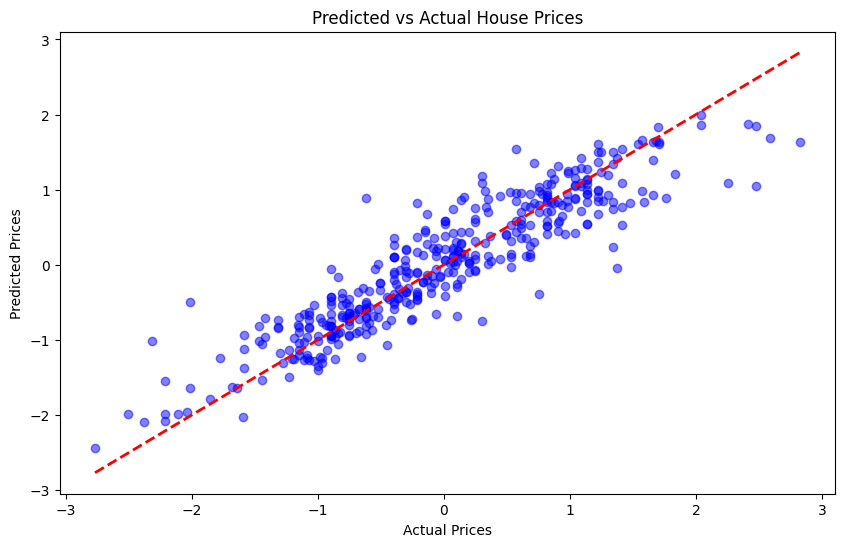

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect prediction
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.show()

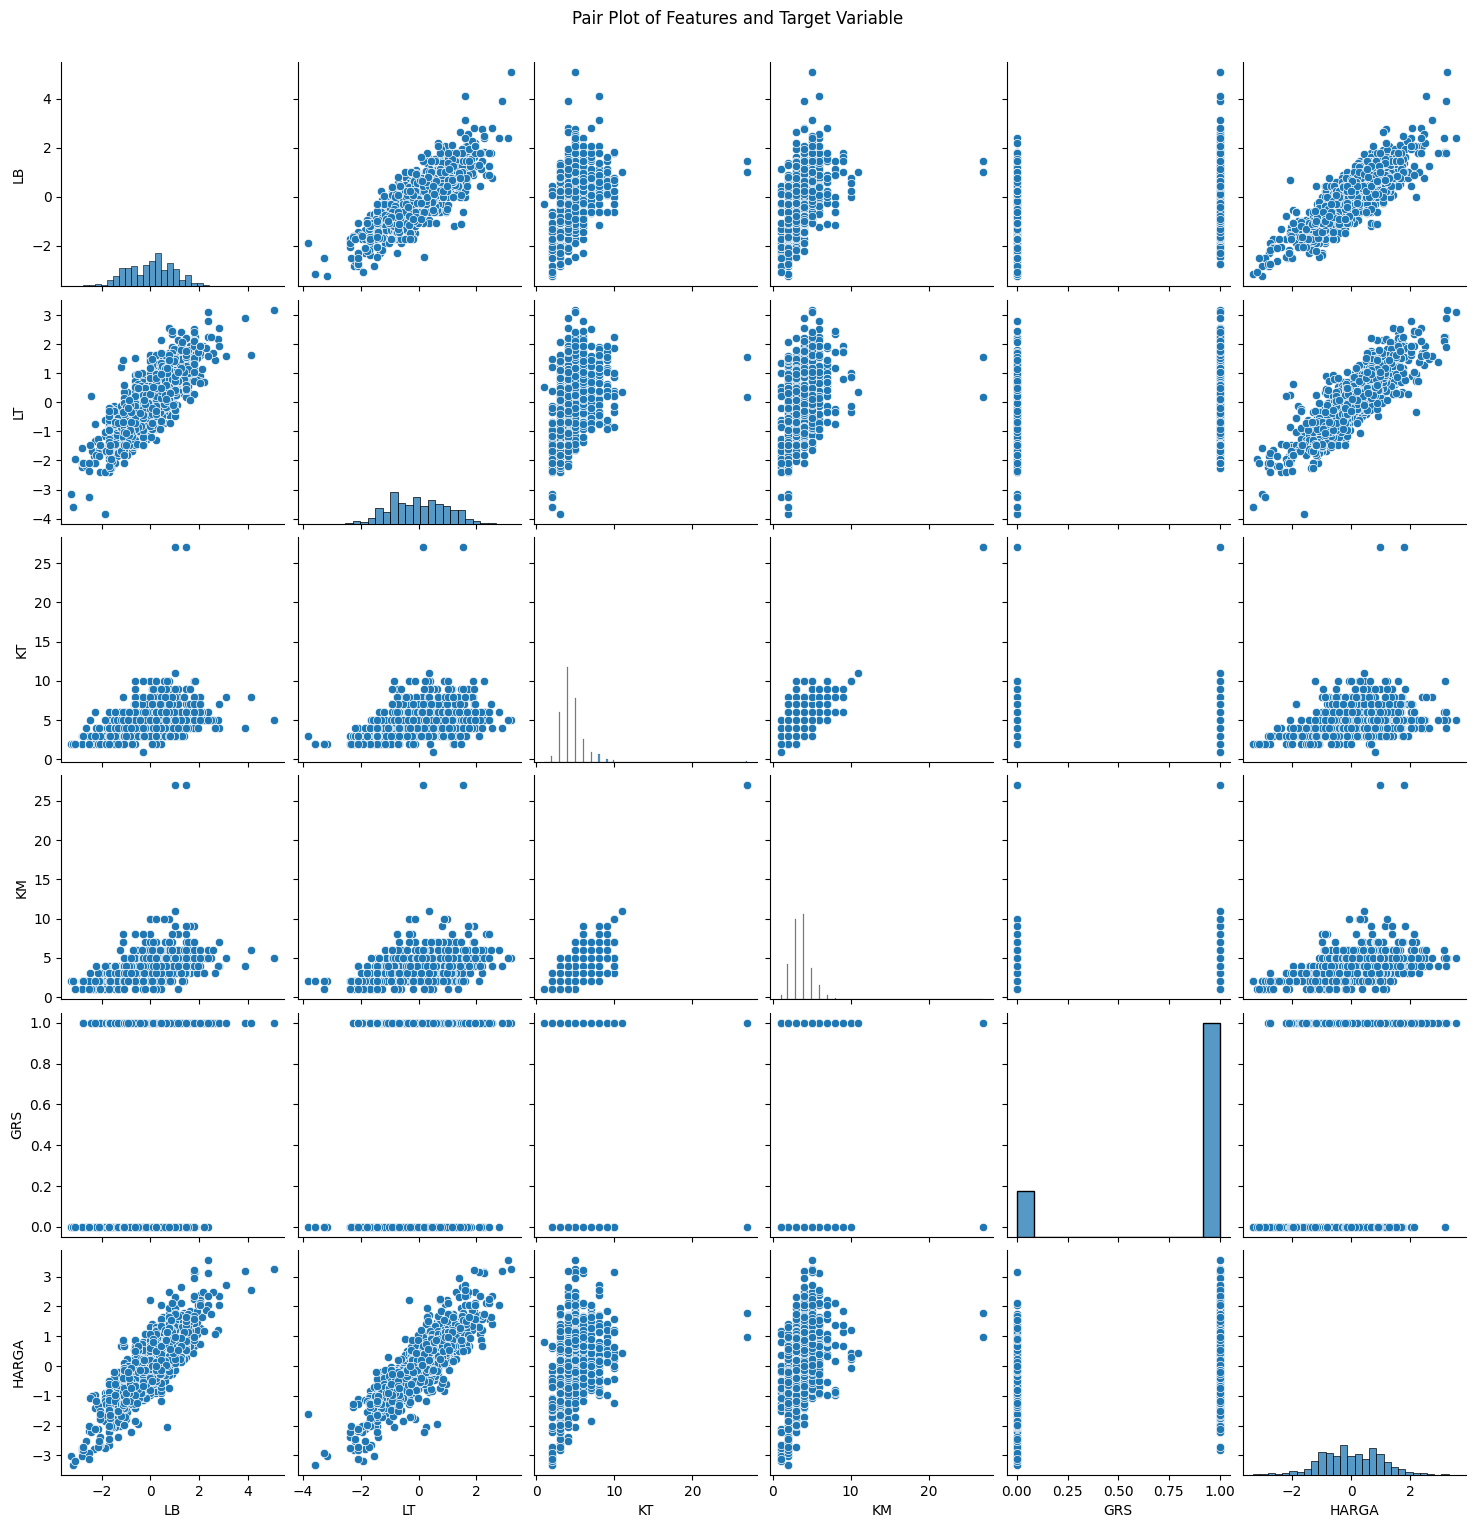

In [ ]:
#pairplot
data_for_pairplot = pd.concat([X_train, y_train], axis=1)
sns.pairplot(data_for_pairplot)
plt.suptitle("Pair Plot of Features and Target Variable", y=1.02)
plt.show()

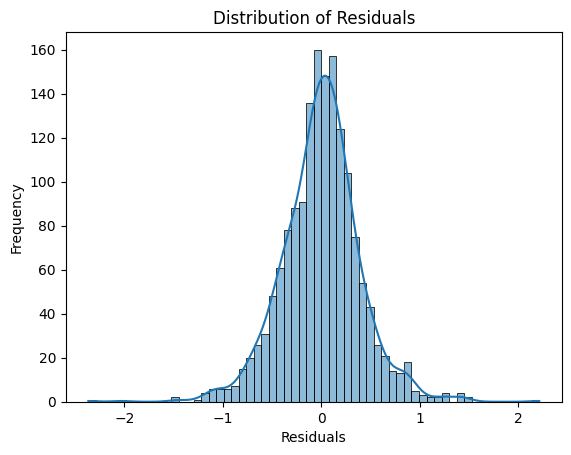

In [ ]:
#residualPlot
y_train_pred = model.predict(X_train_scaled)
residuals = y_train - y_train_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [ ]:
#Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train, cv=5, scoring='r2')

In [ ]:
# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", cv_scores)
print("Mean Cross-validated R-squared:", np.mean(cv_scores))

Cross-validated R-squared scores: [0.83548612 0.85421262 0.83340163 0.82465202 0.85886592]
Mean Cross-validated R-squared: 0.8413236603336995


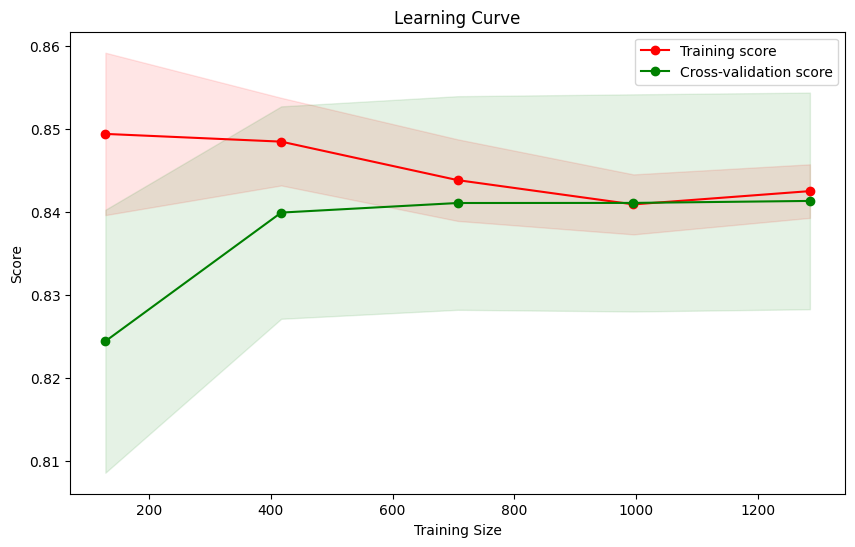

In [ ]:
# Calculate mean and std deviation for training and testing scores
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

Corellation matrix

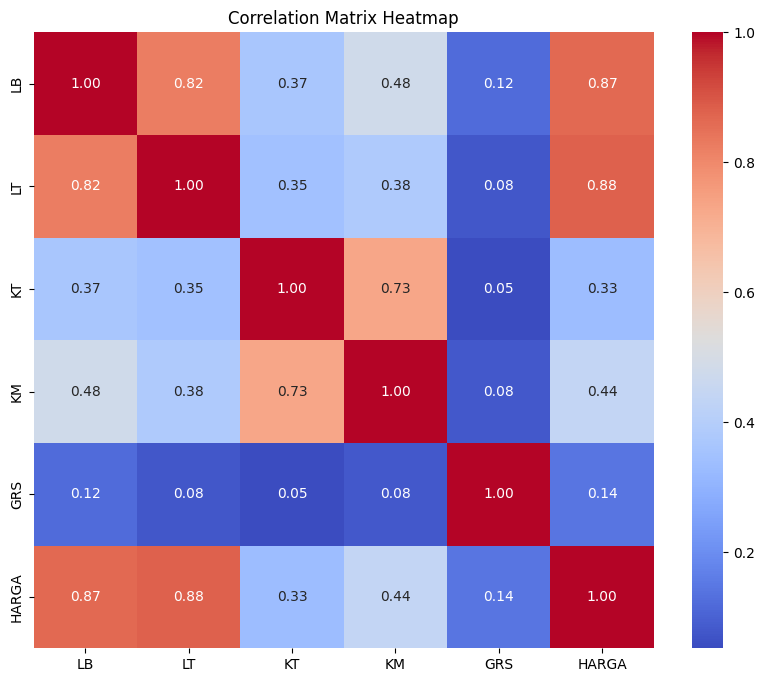

In [ ]:
#Heatmap Korelasi Matrix
corr_matrix = data_for_covariance.corr()  # Use the combined DataFrame from previous code
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()